King County House Sales
Author: Vrushali Sudha

Overview :-
The scope of this study is to assist a real estate agency that helps individuals in selling homes. The expected outcome is to guide homeowners on how home renovations could potentially enhance the assessed value of their properties by
identifing the key property features which implicate or can elucidate the variability in House prices.
The model I prepared is created through 4 iterations.


In [1]:
 # Importing standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
#from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import FunctionTransformer
sns.set_theme(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Displaying the Column Names Markdown File
from IPython.display import Markdown, display
display(Markdown("data/column_names.md"))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [3]:
# Importing the Kings County House Data
df_data = pd.read_csv('data/kc_house_data.csv')
df_data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [4]:
df_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [5]:
df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Data Understanding & Preparation:- PRIMARY SCANNING OF DATASET
After having seen the columns - I will be dropping columns "Id" and "View" as they are inconsequential to the context of this study.
Secondly- "lat", and "long" and "zip code" can affect the house prices. However, homeowners cannot alter the coordinates and location of a house with renovations, and the primary objective of this study is to provide advice to homeowners about how home renovations might increase the estimated value of their homes.Therefore i will also be excluding "lat", "long" and "zip code" from this study.
Thirdly- majority of the attributes are numerical and has no null values. "Waterfront"and "yr_renovated" have null values which will need to be addressed.
"Sqft_basement" attribute also stands out with its data type, which is object but it should be float.
Finally, I want to explore "Date", "yr_built" and "yr_renovated" attributes more in depth to see if I can transform them into more relevant attributes that can be used to draw inferences from this study.


In [6]:
# First, I will drop "id", "view", "lat" and "long" columns.
df_data = df_data.drop(['id','lat','long','view','zipcode'], axis=1) 
df_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(9), object(2)
memory usage: 2.6+ MB


In [8]:
df_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1788.60,1971.00,83.64,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.65,1.17,827.76,29.38,399.95,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,370.00,1900.00,0.00,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1190.00,1951.00,0.00,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,1975.00,0.00,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,2210.00,1997.00,0.00,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,9410.00,2015.00,2015.00,6210.00,871200.00


The .describe() function highlights an outlier for 33 bedrooms,the row needs to be deleted

In [9]:
delete_row = df_data[df_data["bedrooms"]==33].index
df_data = df_data.drop(delete_row)

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21596 non-null  object 
 1   price          21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   sqft_living    21596 non-null  int64  
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     19220 non-null  float64
 8   condition      21596 non-null  int64  
 9   grade          21596 non-null  int64  
 10  sqft_above     21596 non-null  int64  
 11  sqft_basement  21596 non-null  object 
 12  yr_built       21596 non-null  int64  
 13  yr_renovated   17754 non-null  float64
 14  sqft_living15  21596 non-null  int64  
 15  sqft_lot15     21596 non-null  int64  
dtypes: float64(5), int64(9), object(2)
memory usage: 2.8+ MB


In [11]:
# Let's explore the "waterfront" feature.
df_data['waterfront'].value_counts(dropna=False)


0.00    19074
NaN      2376
1.00      146
Name: waterfront, dtype: int64

In [12]:
# Waterfront is a categorical attribute where "1" represents the present of the waterview.
# And "0" represents the absent of the view.
# Since we don't know which category the null values belong to, I will create a new "unknown" value for them.
# To have a consistency in the data representation, I'll change '0' to 'No', '1' to 'Yes' as well.

In [13]:
df_data['waterfront'] = df_data['waterfront'].fillna('unknown')
df_data['waterfront'] = df_data['waterfront'].apply(str)
df_data['waterfront'] = df_data['waterfront'].replace({'0.0': 'No', '1.0': 'Yes'})
df_data['waterfront'].value_counts()

No         19074
unknown     2376
Yes          146
Name: waterfront, dtype: int64

In [14]:
# Let's explore "yr_renovated"
df_data['yr_renovated'].value_counts()

0.00       17010
2014.00       73
2013.00       31
2003.00       31
2007.00       30
           ...  
1951.00        1
1953.00        1
1946.00        1
1976.00        1
1948.00        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
df_data['yr_renovated'].isna().sum()

3842

In [16]:
# There are high number of zeros which is similar to nulls. 
# It's highly likely that these nulls values belong to the houses which are not renovated.
# I'll assign '0' to null values.
df_data['yr_renovated'] = df_data['yr_renovated'].fillna(0)

In [17]:
df_data['yr_renovated'].value_counts()

0.00       20852
2014.00       73
2013.00       31
2003.00       31
2007.00       30
           ...  
1951.00        1
1953.00        1
1946.00        1
1976.00        1
1948.00        1
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
# 20,852 houses out of 21,597 (about 96.56% of the total houses) didn't have a renovation.
# I believe the renovation could work as a categorical feature.
# I will categorise the renovations since 2009 as "recently". It'll give the houses renovated in the past 10-11 years.
df_data['renovated'] = np.where(df_data['yr_renovated']== 0, 'not renovated',
 np.where(df_data['yr_renovated']>=2009, 'recently renovated', 'renovated'))

In [19]:
df_data['renovated'].value_counts()


not renovated         20852
renovated               573
recently renovated      171
Name: renovated, dtype: int64

In [20]:
# Since we added the categorical feature for the renovation, I can drop the yr_renovated from my dataset.
df_data = df_data.drop(['yr_renovated'], axis=1)

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21596 non-null  object 
 1   price          21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   sqft_living    21596 non-null  int64  
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     21596 non-null  object 
 8   condition      21596 non-null  int64  
 9   grade          21596 non-null  int64  
 10  sqft_above     21596 non-null  int64  
 11  sqft_basement  21596 non-null  object 
 12  yr_built       21596 non-null  int64  
 13  sqft_living15  21596 non-null  int64  
 14  sqft_lot15     21596 non-null  int64  
 15  renovated      21596 non-null  object 
dtypes: float64(3), int64(9), object(4)
memory usage: 2.8+ MB


In [22]:
# Let's explore "sqft_basement" attribute to see why the data type is not float.
df_data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [23]:
df_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [24]:
# It seems like the "?" value is causing the issue here.
# First, I'll assign "?" to a null value.
df_data.loc[df_data['sqft_basement'] == '?', 'sqft_basement'] = np.nan
# Checking if there's any null values are remaining
df_data['sqft_basement'].isna().sum()

454

In [25]:
# Looking at the data, the sum of "sqft_above" and "sqft_basement" equals to "sqft_living".
# That's why, I'm replacing null values with the "sqft_living" minus "sqft_above"
df_data['sqft_basement'] = df_data['sqft_basement'].fillna(df_data['sqft_living'] - df_data['sqft_above'])
# Checking if there's any null values are remaining
df_data['sqft_basement'].isna().sum()

0

In [26]:
# We have sale year and built years of the houses already.
# I want to add the age of the houses as a new feature because I will it'll make data easier to analyse.
# Let's substract the sale year from the "date" feature.
#First I'm importing datetime module
import datetime
# Then, I'm adding a new column for year of sale
df_data['yr_sale'] = pd.DatetimeIndex(df_data['date']).year
# Finally, based on the year of sale, I'm calculating the age of the house when it's sold
df_data['yr_old'] = df_data['yr_sale'] - df_data['yr_built']
# Let's check the final dataframe to see the changes are implemented
df_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,renovated,yr_sale,yr_old
0,10/13/2014,221900.00,3,1.00,1180,5650,1.00,unknown,3,7,1180,0.0,1955,1340,5650,not renovated,2014,59
1,12/9/2014,538000.00,3,2.25,2570,7242,2.00,No,3,7,2170,400.0,1951,1690,7639,renovated,2014,63
2,2/25/2015,180000.00,2,1.00,770,10000,1.00,No,3,6,770,0.0,1933,2720,8062,not renovated,2015,82
3,12/9/2014,604000.00,4,3.00,1960,5000,1.00,No,5,7,1050,910.0,1965,1360,5000,not renovated,2014,49
4,2/18/2015,510000.00,3,2.00,1680,8080,1.00,No,3,8,1680,0.0,1987,1800,7503,not renovated,2015,28


In [27]:
# Since I used "yr_sale" for the calculation of the "yr_old", I can drop the feature now.
df_data = df_data.drop(['yr_sale'], axis=1)
# I have no use for the date as well.
df_data = df_data.drop(['date'], axis=1)

In [28]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   sqft_living    21596 non-null  int64  
 4   sqft_lot       21596 non-null  int64  
 5   floors         21596 non-null  float64
 6   waterfront     21596 non-null  object 
 7   condition      21596 non-null  int64  
 8   grade          21596 non-null  int64  
 9   sqft_above     21596 non-null  int64  
 10  sqft_basement  21596 non-null  object 
 11  yr_built       21596 non-null  int64  
 12  sqft_living15  21596 non-null  int64  
 13  sqft_lot15     21596 non-null  int64  
 14  renovated      21596 non-null  object 
 15  yr_old         21596 non-null  int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 2.8+ MB


In [29]:
# Finally, I want to check the unique values of the other features to see if there are any issues need addressing.
df_data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

In [30]:
df_data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [31]:
df_data['condition'].unique()


array([3, 5, 4, 1, 2], dtype=int64)

In [32]:
df_data['grade'].unique()


array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [33]:
df_data['yr_old'].unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1],
      dtype=int64)

In [34]:
df_data = df_data[df_data.yr_old > 0]


In [35]:
df_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,renovated,yr_old
0,221900.00,3,1.00,1180,5650,1.00,unknown,3,7,1180,0.0,1955,1340,5650,not renovated,59
1,538000.00,3,2.25,2570,7242,2.00,No,3,7,2170,400.0,1951,1690,7639,renovated,63
2,180000.00,2,1.00,770,10000,1.00,No,3,6,770,0.0,1933,2720,8062,not renovated,82
3,604000.00,4,3.00,1960,5000,1.00,No,5,7,1050,910.0,1965,1360,5000,not renovated,49
4,510000.00,3,2.00,1680,8080,1.00,No,3,8,1680,0.0,1987,1800,7503,not renovated,28


In [36]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21154 non-null  float64
 1   bedrooms       21154 non-null  int64  
 2   bathrooms      21154 non-null  float64
 3   sqft_living    21154 non-null  int64  
 4   sqft_lot       21154 non-null  int64  
 5   floors         21154 non-null  float64
 6   waterfront     21154 non-null  object 
 7   condition      21154 non-null  int64  
 8   grade          21154 non-null  int64  
 9   sqft_above     21154 non-null  int64  
 10  sqft_basement  21154 non-null  object 
 11  yr_built       21154 non-null  int64  
 12  sqft_living15  21154 non-null  int64  
 13  sqft_lot15     21154 non-null  int64  
 14  renovated      21154 non-null  object 
 15  yr_old         21154 non-null  int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 2.7+ MB


In [37]:
# Sqft_basement needs to be a numerical value
# Changing the data type

df_data['sqft_basement'] = df_data['sqft_basement'].astype('float')


In [38]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21154 non-null  float64
 1   bedrooms       21154 non-null  int64  
 2   bathrooms      21154 non-null  float64
 3   sqft_living    21154 non-null  int64  
 4   sqft_lot       21154 non-null  int64  
 5   floors         21154 non-null  float64
 6   waterfront     21154 non-null  object 
 7   condition      21154 non-null  int64  
 8   grade          21154 non-null  int64  
 9   sqft_above     21154 non-null  int64  
 10  sqft_basement  21154 non-null  float64
 11  yr_built       21154 non-null  int64  
 12  sqft_living15  21154 non-null  int64  
 13  sqft_lot15     21154 non-null  int64  
 14  renovated      21154 non-null  object 
 15  yr_old         21154 non-null  int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 2.7+ MB


Multicollinearity of Features
Before diving into the modelling, I will check the multicollinearity between my numerical values to decide which ones shouldn't be used.

In [39]:
numerical = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
 'condition','grade','sqft_above', 'sqft_basement', 'yr_built',
 'sqft_living15', 'sqft_lot15', 'yr_old']
# New dataframe of numberical features only
df_num = df_data[numerical]
#Displaying the new dataframe
df_num.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,yr_old
0,3,1.00,1180,5650,1.00,3,7,1180,0.00,1955,1340,5650,59
1,3,2.25,2570,7242,2.00,3,7,2170,400.00,1951,1690,7639,63
2,2,1.00,770,10000,1.00,3,6,770,0.00,1933,2720,8062,82
3,4,3.00,1960,5000,1.00,5,7,1050,910.00,1965,1360,5000,49
4,3,2.00,1680,8080,1.00,3,8,1680,0.00,1987,1800,7503,28


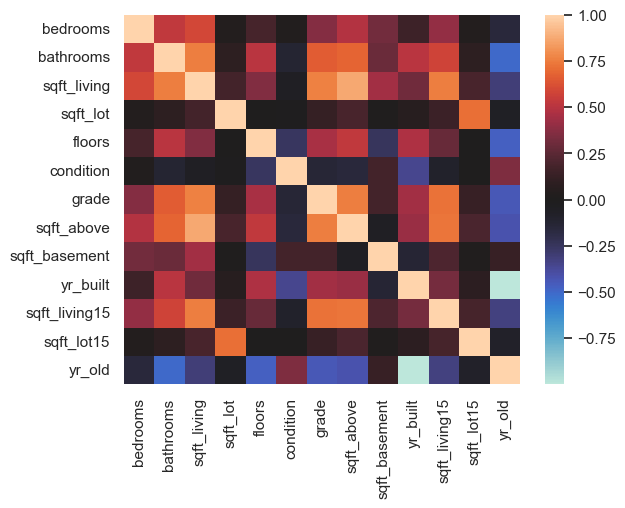

In [40]:
# Creating a heatmap of the independent variables
sns.heatmap(df_num.corr(), center=0);

In [41]:
# Creating a table that will show the highly correlated features 
# Correlation greater than 0.75) 
df = df_num.corr().abs().stack().reset_index()
df.columns = ['feature1', 'feature2', 'corr']
df[(df['corr']>.75) & (df['corr'] <1)]


,feature1,feature2,corr
15,bathrooms,sqft_living,0.75
27,sqft_living,bathrooms,0.75
32,sqft_living,grade,0.76
33,sqft_living,sqft_above,0.87
36,sqft_living,sqft_living15,0.76
80,grade,sqft_living,0.76
85,grade,sqft_above,0.76
93,sqft_above,sqft_living,0.87
97,sqft_above,grade,0.76
129,yr_built,yr_old,1.00


The features "yr_old" and "yr_built" shows perfect co-linearity which makes sense because I calculated the Yr_old based on the Yr_built - so they interact in
an "additive" manner. 
 Similarly, The features "sqft_living" and "sqft_above" also exude perfect co-linearity.It also makes sense because "sqft_living" interacts with "sqft_above" and "sqft_basement" as an additive manner as well. 
As, 'sqft_living15','grade' and "bathrooms" exhibit high multcolinearity with 'sqft_living' 
As 'sqft_living' is more important than any of these i have decided to exclude these three in my study as well.
In summary, I will exclude "yr_built", "grade""sqft_above""sqft_living15" and "bathrooms" from the study.

In [42]:
# I will create a new dataframe without the features I'm excluding.
# I'm not simply dropping the features because I may need to use them in the future.
data_final = df_data.drop(['yr_built','sqft_living15','grade','sqft_above','bathrooms'], axis=1)
# Displaying the new dataframe
data_final.head()


,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,sqft_lot15,renovated,yr_old
0,221900.00,3,1180,5650,1.00,unknown,3,0.00,5650,not renovated,59
1,538000.00,3,2570,7242,2.00,No,3,400.00,7639,renovated,63
2,180000.00,2,770,10000,1.00,No,3,0.00,8062,not renovated,82
3,604000.00,4,1960,5000,1.00,No,5,910.00,5000,not renovated,49
4,510000.00,3,1680,8080,1.00,No,3,0.00,7503,not renovated,28


In [43]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21154 non-null  float64
 1   bedrooms       21154 non-null  int64  
 2   sqft_living    21154 non-null  int64  
 3   sqft_lot       21154 non-null  int64  
 4   floors         21154 non-null  float64
 5   waterfront     21154 non-null  object 
 6   condition      21154 non-null  int64  
 7   sqft_basement  21154 non-null  float64
 8   sqft_lot15     21154 non-null  int64  
 9   renovated      21154 non-null  object 
 10  yr_old         21154 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 1.9+ MB


Checking for Linearity of Parameters


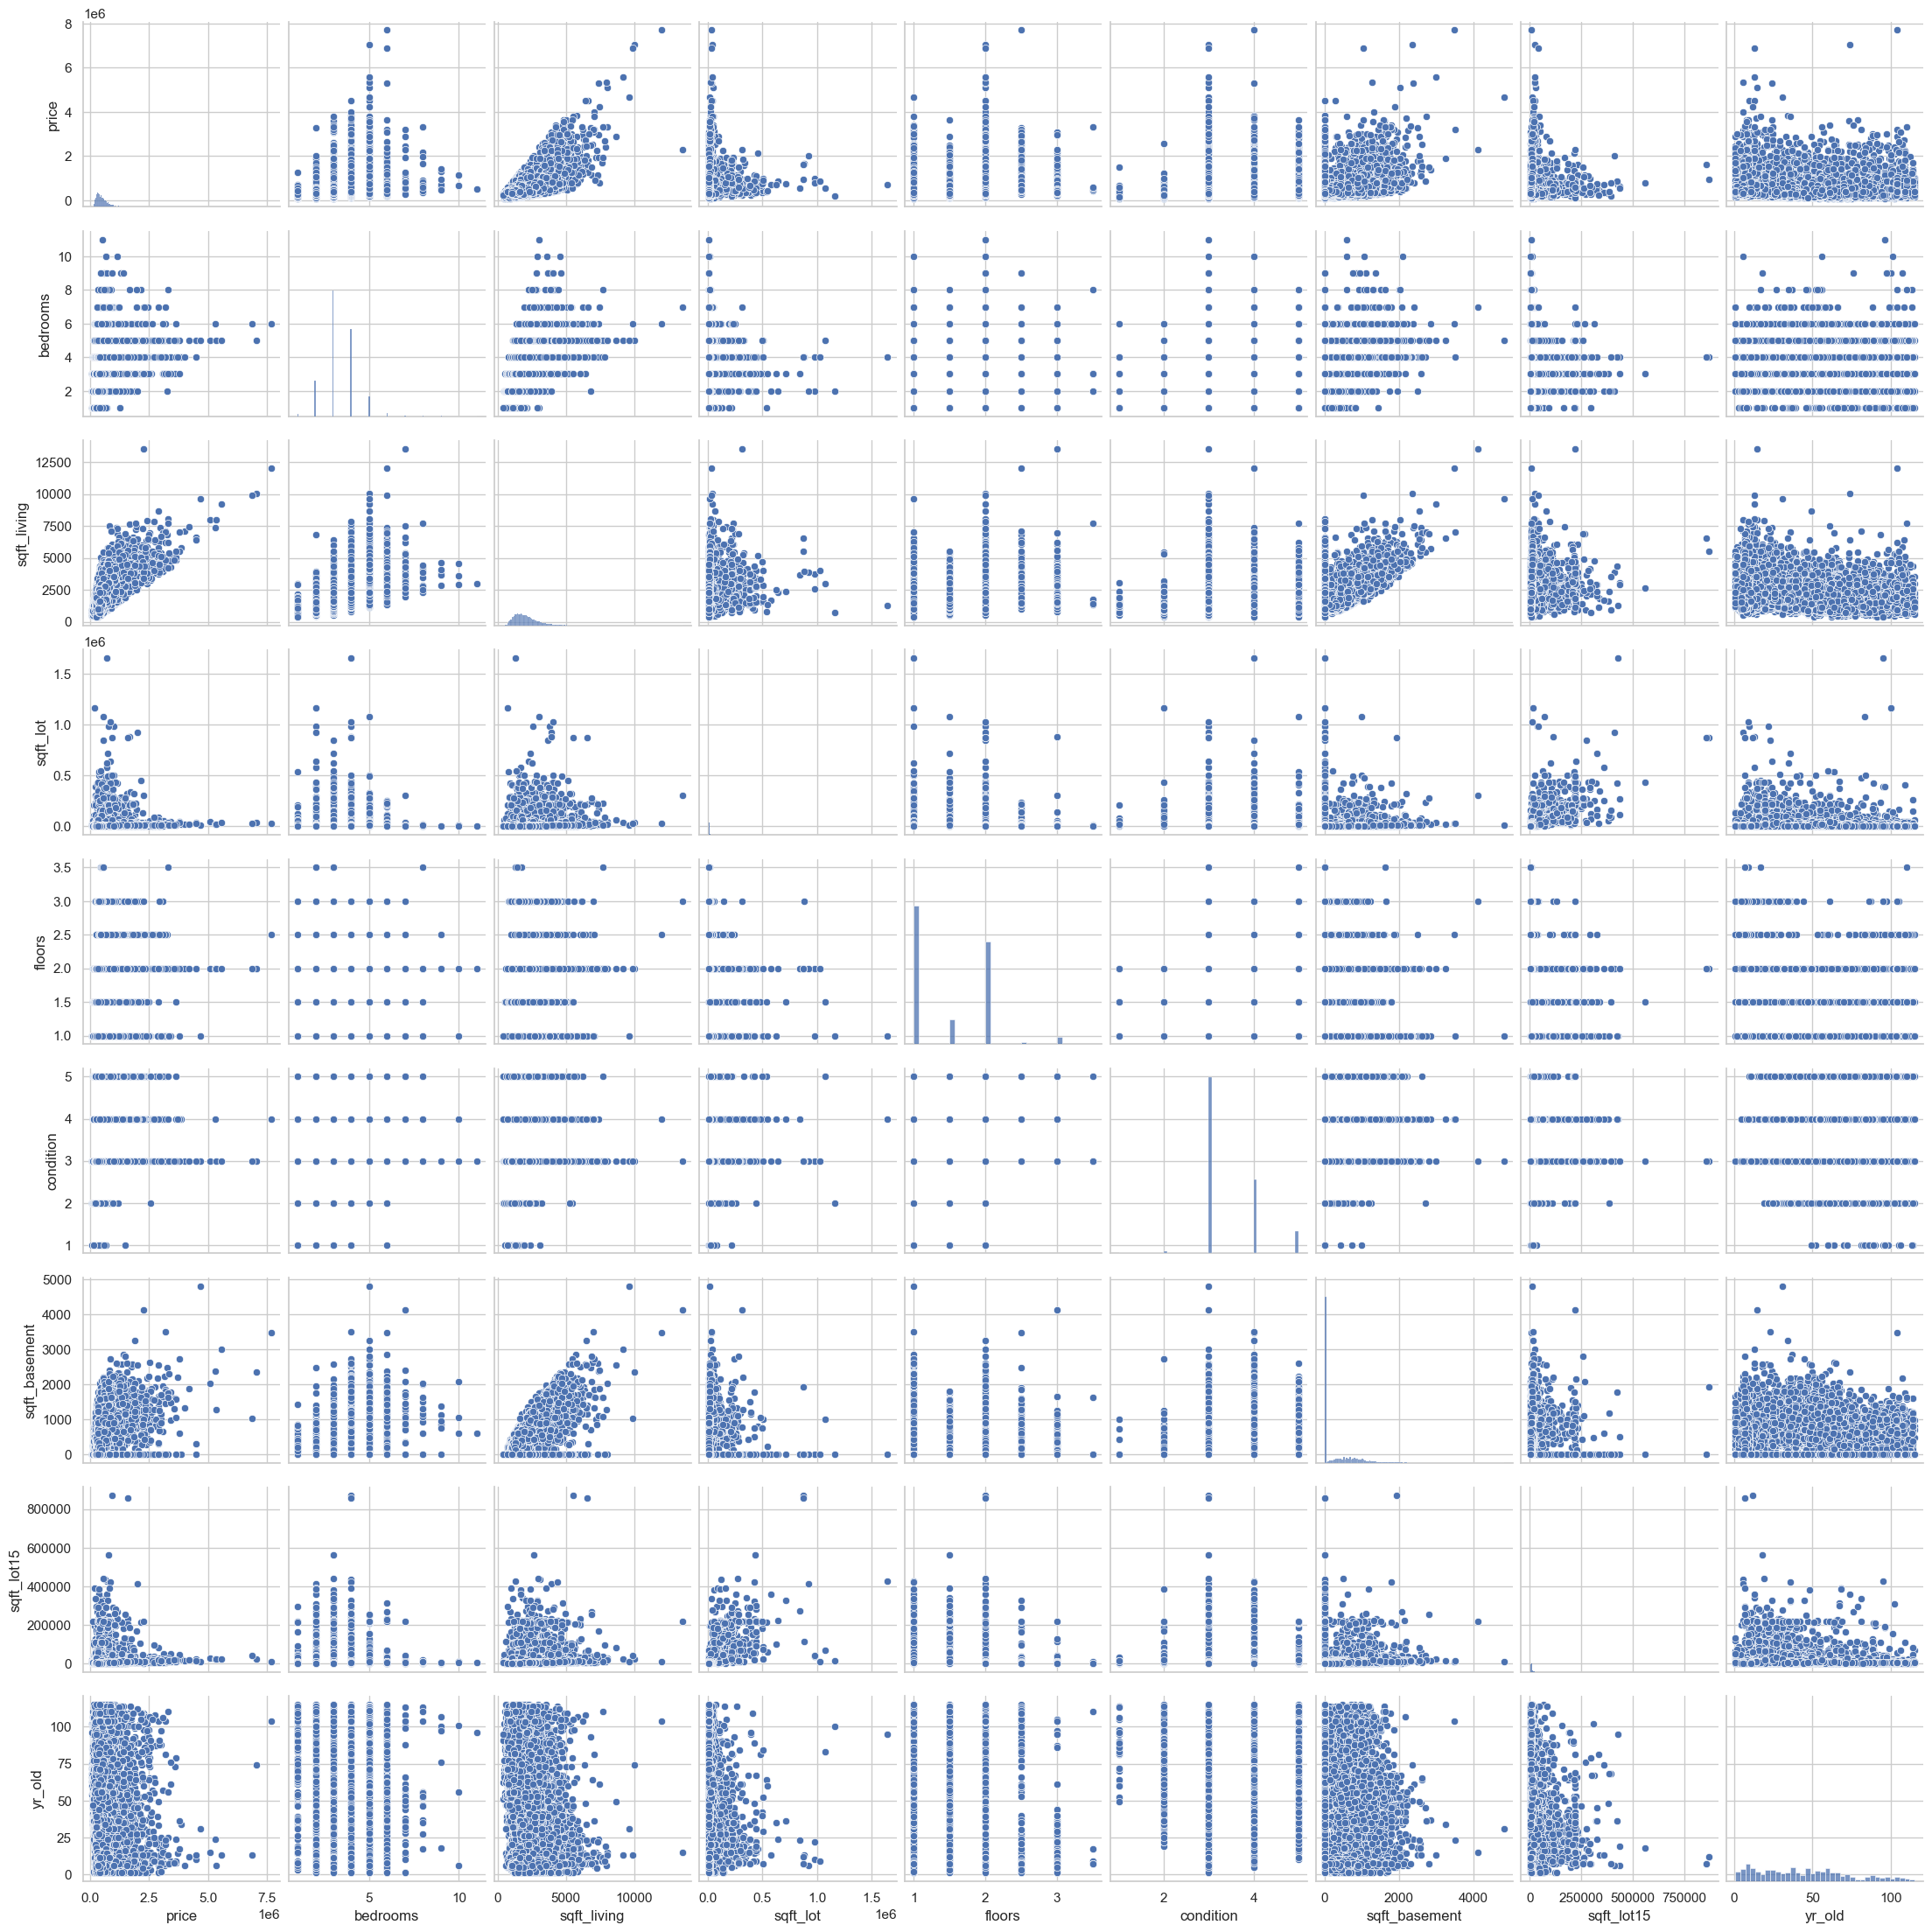

In [44]:
sns.pairplot(data_final);


From a first glance, I can see that none of the columns have a strong linear relationship with price. Because I'm running a MLR model, I will transform
the features iteratively.
Features "waterfront" and "renovated" are definetely categorical values need to be one hot encoded. Features "floors" and "condition"  and "bedrooms" are also categorical as their scatter plot exhibit discrete values

In [45]:
# Creating dummies for "bedrooms", "waterfront", and "renovated"  AND "condition" features.
# Dropping one of the dummy variables for each categorical feature to avoid "dummy variable trap"
bedrooms_dummies = pd.get_dummies(data_final['bedrooms'], prefix='bedrooms', drop_first=True)
reno_dummies = pd.get_dummies(data_final['renovated'], prefix='reno', drop_first=True)
floors_dummies = pd.get_dummies(data_final['floors'], prefix='floors', drop_first=True)
condition_dummies = pd.get_dummies(data_final['condition'], prefix='condition', drop_first=True)

# I want to drop the "unknown" value in the "waterfront" feature. That's why, I'll drop the value later.
water_dummies = pd.get_dummies(data_final['waterfront'], prefix='water', drop_first=False)

# Removing the original columns from the data while creating a new dataframe
df_ohe = data_final.drop(['bedrooms','renovated','floors','condition','waterfront'], axis = 1)
# Adding the dummy columns
df_ohe = pd.concat([df_ohe, bedrooms_dummies, reno_dummies, floors_dummies, condition_dummies, water_dummies], axis=1)

# Dropping "wtr_Unknown" to avoid "dummy variable trap"
df_ohe = df_ohe.drop(['water_unknown'], axis=1)
# Checking the new dataframe
df_ohe.head()


,price,sqft_living,sqft_lot,sqft_basement,sqft_lot15,yr_old,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_2,condition_3,condition_4,condition_5,water_No,water_Yes
0,221900.00,1180,5650,0.00,5650,59,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.00,2570,7242,400.00,7639,63,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,180000.00,770,10000,0.00,8062,82,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,604000.00,1960,5000,910.00,5000,49,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,510000.00,1680,8080,0.00,7503,28,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [46]:
 df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21154 non-null  float64
 1   sqft_living              21154 non-null  int64  
 2   sqft_lot                 21154 non-null  int64  
 3   sqft_basement            21154 non-null  float64
 4   sqft_lot15               21154 non-null  int64  
 5   yr_old                   21154 non-null  int64  
 6   bedrooms_2               21154 non-null  uint8  
 7   bedrooms_3               21154 non-null  uint8  
 8   bedrooms_4               21154 non-null  uint8  
 9   bedrooms_5               21154 non-null  uint8  
 10  bedrooms_6               21154 non-null  uint8  
 11  bedrooms_7               21154 non-null  uint8  
 12  bedrooms_8               21154 non-null  uint8  
 13  bedrooms_9               21154 non-null  uint8  
 14  bedrooms_10           

Model Creation
This is the step where we fit the data with a multilinear regression model. It is an iterative approach that will tune models to get the highest performance
possible.
While creating the model iterations, we'll check the primary assumptions for the multilinear regression - linearity, normality and homoscedasticity. We'll also
use a "train and test split" to validate each model iteration

Iteration 1: Model 1
I will create the first model without running any transformations. So far, I removed the predictors that have high multicolinaerity and created dummy variables
for the categorical predictors.

In [47]:
# First, I'm splitting the data into train and test groups
# X is my independent variables aka features
X = df_ohe.drop("price", axis=1)
# Y is my dependent variable which is "price" in this model
y = df_ohe["price"]
# Splitting the data
# Using a random state for reproducible output
# I picked "25" as a random state
# We have 21,597 entries in this dataframe and I need to decide what the split ratio will be.
# With less testing data, the performance of the model will have greater variance.
# With less training data, my parameters estimates will have greater variance.
# Because the size of my sample (n=21,597) is not too large, I'll follow the industry best practice.
# I'm using 80/20 split here (instead of 75/25 default split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
# Fitting a linear regression model and calculate MSE for test and train
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
# Calculating the R2 and MSE
train_r2 = r2_score(y_train, y_hat_train)
test_r2 = r2_score(y_test, y_hat_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)


Training Scores: R2 0.5875769735716991 & Mean Absolute Error 54965792023.30568
Testing Scores: R2 0.597071951198622 & Mean Absolute Error 55932450903.896255


Comments:
The first model explains 58.7% of the variance in the dependent variable (Y) by the independent variables (X) whereas the test group explains 59.7% of the variance. The difference in R2s only -1.00% (Test vs Train).
Mean Absolute Erros (MSEs) are also producing close outputs. 
The difference between test score and training score is small. 

Evaluation of The Model 1


In [50]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_train X_test y_train y_test 
X_train_with_intercept = sm.add_constant(X_train)
model_1 = sm.OLS(y_train,X_train_with_intercept).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:50:44   Log-Likelihood:            -2.3327e+05
No. Observations:               16923   AIC:                         4.666e+05
Df Residuals:                   16894   BIC:                         4.668e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.184e+05   5.56e+04     -3.925      0.000   -3.27e+05   -1.09e+05
sqft_living               335.2376      3.300    101.584      0.000     328.769     341.706
sqft_lot                    0.0196      0.059      0.332      0.740      -0.096       0.136
sqft_basement             -26.6553      5.488     -4.857      0.000     -37.412     -15.899
sqft_lot15                 -0.7677      0.097     -7.906      0.000      -0.958      -0.577
yr_old                   2636.2613     89.991     29.295      0.000    2459.870    2812.652
bedrooms_2              -7217.8128   1.98e+04     -0.364      0.716   -4.61e+04    3.17e+04
bedrooms_3              -8.433e+04   1.96e+04     -4.309      0.000   -1.23e+05    -4.6e+04
bedrooms_4              -1.482e+05      2e+04     -7.422      0.000   -1.87e+05   -1.09e+05
bedrooms_5              -1.626e+05   2.11e+04     -7.703      0.000   -2.04e+05   -1.21e+05
bedrooms_6              -2.855e+05   2.56e+04    -11.139      0.000   -3.36e+05   -2.35e+05
bedrooms_7              -3.225e+05   4.77e+04     -6.756      0.000   -4.16e+05   -2.29e+05
bedrooms_8              -2.186e+05   7.43e+04     -2.943      0.003   -3.64e+05    -7.3e+04
bedrooms_9              -4.019e+05   1.07e+05     -3.743      0.000   -6.12e+05   -1.91e+05
bedrooms_10             -5.423e+05   2.36e+05     -2.302      0.021      -1e+06   -8.05e+04
bedrooms_11              -5.99e+05   2.36e+05     -2.541      0.011   -1.06e+06   -1.37e+05
reno_recently renovated  9.875e+04   1.99e+04      4.956      0.000    5.97e+04    1.38e+05
reno_renovated           3.332e+04   1.17e+04      2.853      0.004    1.04e+04    5.62e+04
floors_1.5                803.9488   7090.147      0.113      0.910   -1.31e+04    1.47e+04
floors_2.0               3.152e+04   5499.650      5.731      0.000    2.07e+04    4.23e+04
floors_2.5                1.54e+05   2.16e+04      7.128      0.000    1.12e+05    1.96e+05
floors_3.0               2.123e+05   1.23e+04     17.242      0.000    1.88e+05    2.36e+05
floors_3.5               2.891e+05   9.67e+04      2.990      0.003    9.96e+04    4.79e+05
condition_2             -8319.0854   5.62e+04     -0.148      0.882   -1.19e+05    1.02e+05
condition_3               3.54e+04   5.28e+04      0.671      0.502    -6.8e+04    1.39e+05
condition_4              4.817e+04   5.28e+04      0.913      0.362   -5.53e+04    1.52e+05
condition_5              8.306e+04   5.31e+04      1.565      0.118   -2.09e+04    1.87e+05
water_No                -1919.4591   5779.729     -0.332      0.740   -1.32e+04    9409.412
water_Yes                7.552e+05   2.25e+04     33.551      0.000    7.11e+05    7.99e+05
==============================================================================
Omnibus:                     8686.913   Durbin-Watson:      

Comments:
 
The very high Jarque-Bera result shows that the errors are not normally distributed.
Finally, the condition number is large, 6.71e+06. It means that the model's predictions are highly sensitive to small changes in the input features, and the model may not be very stable or reliable.
Based on the  above model i will have to eliminate a FEW features that will not be useful in the predictive analysis as they are not statistically significant in in explaining the variance in house prices of the model moving forward
This will be done based on the P VALUES which are greater than 0.05(significance level).
The statisctical significance of these predictor variables with respect to house prices can also be seen in the confidence interval of these variables(as it has has zero in them)
so we sill be dropping -'sqft_lot','bedrooms_2','floors_1.5','condition_2','condition_3','condition_4','condition_5','water_No' in ITERATION2

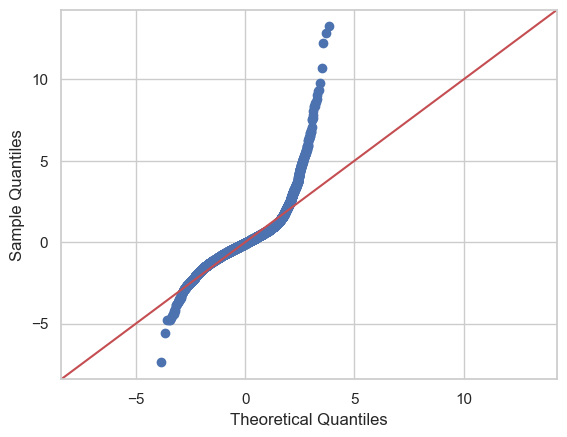

In [51]:
# Let's look into the normality assumptions with visuals.
# Drawing a Q-Q Plot the check how the errors are distributed.
resid1 = model_1.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

As expected, the residuals are not normally distributed. The graph indicates a wide spread and right skewness

In [52]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 3067.3109442371806),
 ('p-value', 0.0),
 ('f-value', 133.5685262653653),
 ('f p-value', 0.0)]

I have used the Bresuch-Pagan test for determining heteroscedasticity.
If the p-value is below a certain threshold (common choices are 0.01, 0.05, and 0.10) then there is sufficient evidence to say that heteroscedasticity is present. So, as the p-value is definetely below 0.05, we can discern hetroscedasticity in error residuals. 

In [53]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21154 non-null  float64
 1   sqft_living              21154 non-null  int64  
 2   sqft_lot                 21154 non-null  int64  
 3   sqft_basement            21154 non-null  float64
 4   sqft_lot15               21154 non-null  int64  
 5   yr_old                   21154 non-null  int64  
 6   bedrooms_2               21154 non-null  uint8  
 7   bedrooms_3               21154 non-null  uint8  
 8   bedrooms_4               21154 non-null  uint8  
 9   bedrooms_5               21154 non-null  uint8  
 10  bedrooms_6               21154 non-null  uint8  
 11  bedrooms_7               21154 non-null  uint8  
 12  bedrooms_8               21154 non-null  uint8  
 13  bedrooms_9               21154 non-null  uint8  
 14  bedrooms_10           

In [54]:
df1_ohe = df_ohe.drop(['sqft_lot','bedrooms_2','floors_1.5','condition_2','condition_3','condition_4','condition_5','water_No'], axis=1)

In [55]:
df1_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21154 non-null  float64
 1   sqft_living              21154 non-null  int64  
 2   sqft_basement            21154 non-null  float64
 3   sqft_lot15               21154 non-null  int64  
 4   yr_old                   21154 non-null  int64  
 5   bedrooms_3               21154 non-null  uint8  
 6   bedrooms_4               21154 non-null  uint8  
 7   bedrooms_5               21154 non-null  uint8  
 8   bedrooms_6               21154 non-null  uint8  
 9   bedrooms_7               21154 non-null  uint8  
 10  bedrooms_8               21154 non-null  uint8  
 11  bedrooms_9               21154 non-null  uint8  
 12  bedrooms_10              21154 non-null  uint8  
 13  bedrooms_11              21154 non-null  uint8  
 14  reno_recently renovate

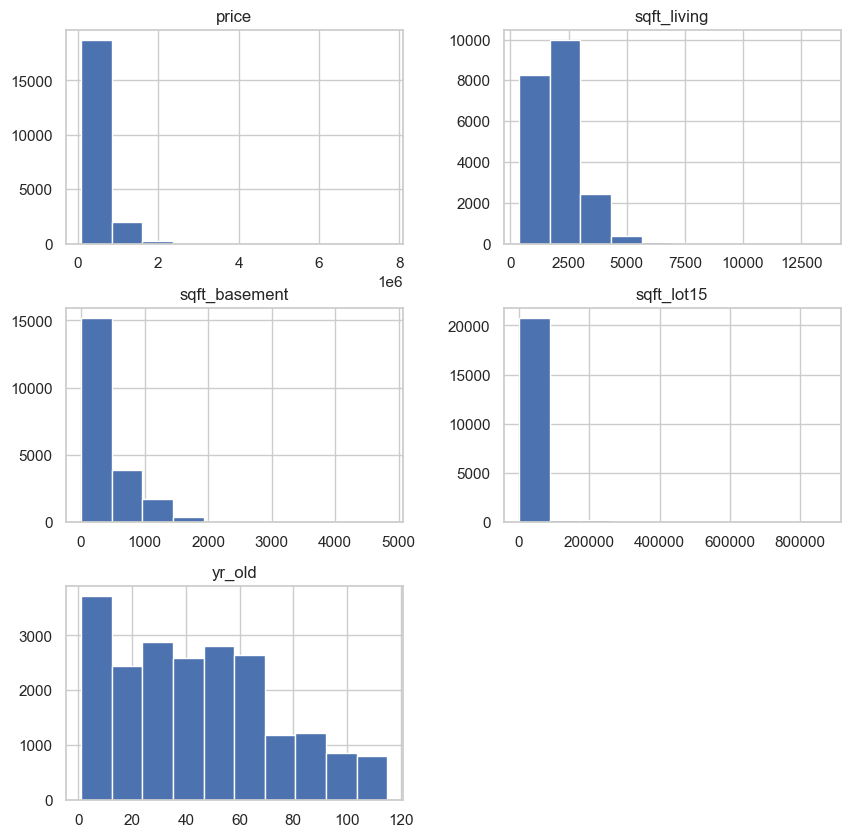

In [56]:
# Seperating the continuous variables
continuous = ['price','sqft_living','sqft_basement','sqft_lot15', 'yr_old']
df1_cont = df1_ohe[continuous]
# Let's check the skewness with histograms
df1_cont.hist(figsize= (10, 10))
plt.show()


None of the variables are normally distributed.


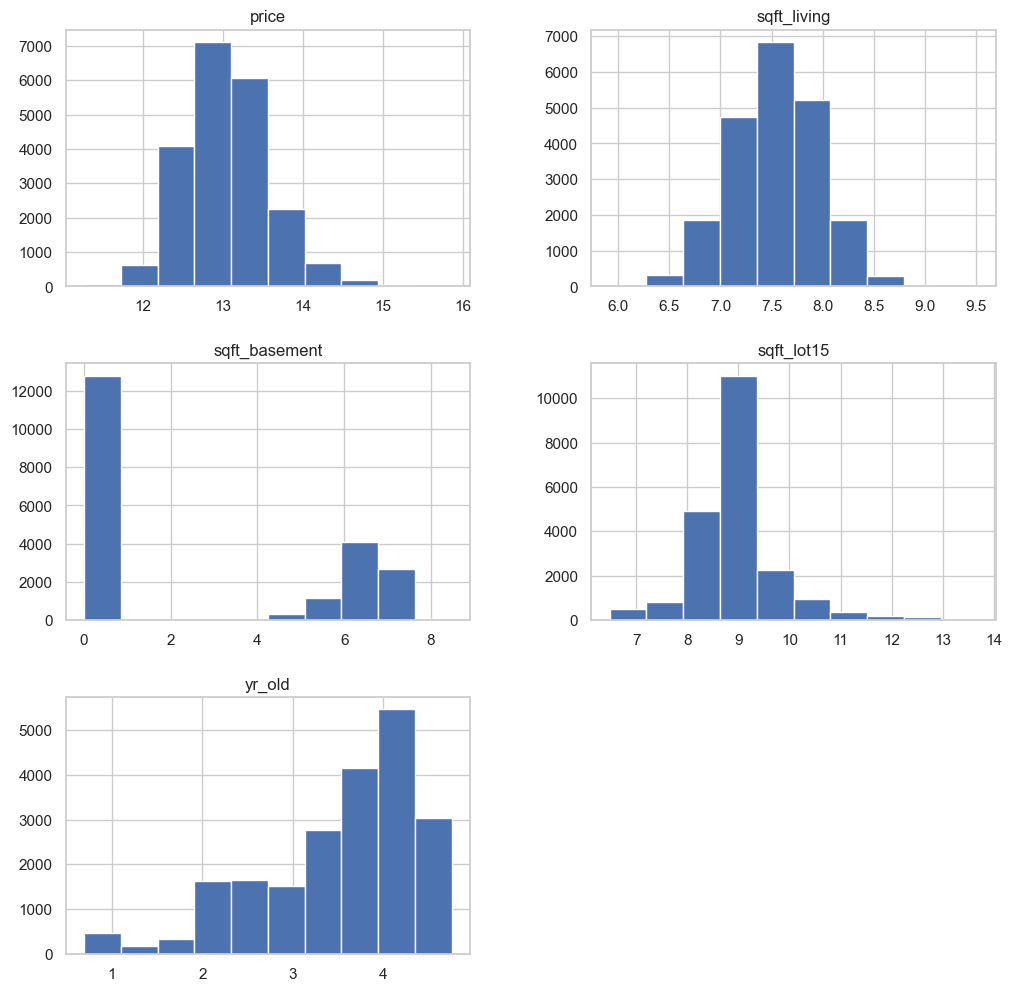

In [57]:
# Taking logs of continuous dataset
df1_cont_log = np.log1p(df1_cont)
# Replace infinite updated data with nan
df1_cont_log.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df1_cont_log.dropna(inplace=True)
# Plotting histograms
df1_cont_log.hist(figsize= (12, 12))
plt.show()

In [58]:
df1_cont_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21154 non-null  float64
 1   sqft_living    21154 non-null  float64
 2   sqft_basement  21154 non-null  float64
 3   sqft_lot15     21154 non-null  float64
 4   yr_old         21154 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


In [59]:
log_transformer = FunctionTransformer(np.log, validate=True)

log_names = [f'{column}_log' for column in df1_cont.columns]
df1_cont_log.columns = log_names

In [60]:
df1_cont_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_log          21154 non-null  float64
 1   sqft_living_log    21154 non-null  float64
 2   sqft_basement_log  21154 non-null  float64
 3   sqft_lot15_log     21154 non-null  float64
 4   yr_old_log         21154 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


In [61]:
df1_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21154 non-null  float64
 1   sqft_living              21154 non-null  int64  
 2   sqft_basement            21154 non-null  float64
 3   sqft_lot15               21154 non-null  int64  
 4   yr_old                   21154 non-null  int64  
 5   bedrooms_3               21154 non-null  uint8  
 6   bedrooms_4               21154 non-null  uint8  
 7   bedrooms_5               21154 non-null  uint8  
 8   bedrooms_6               21154 non-null  uint8  
 9   bedrooms_7               21154 non-null  uint8  
 10  bedrooms_8               21154 non-null  uint8  
 11  bedrooms_9               21154 non-null  uint8  
 12  bedrooms_10              21154 non-null  uint8  
 13  bedrooms_11              21154 non-null  uint8  
 14  reno_recently renovate

In [62]:
categoricals = ['bedrooms_3','bedrooms_4','bedrooms_5','bedrooms_6','bedrooms_7','bedrooms_8','bedrooms_9','bedrooms_10','bedrooms_11','reno_recently renovated','reno_renovated','floors_2.0','floors_2.5','floors_3.0','floors_3.5','water_Yes']
df1_cat = df1_ohe[categoricals]

In [63]:
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   bedrooms_3               21154 non-null  uint8
 1   bedrooms_4               21154 non-null  uint8
 2   bedrooms_5               21154 non-null  uint8
 3   bedrooms_6               21154 non-null  uint8
 4   bedrooms_7               21154 non-null  uint8
 5   bedrooms_8               21154 non-null  uint8
 6   bedrooms_9               21154 non-null  uint8
 7   bedrooms_10              21154 non-null  uint8
 8   bedrooms_11              21154 non-null  uint8
 9   reno_recently renovated  21154 non-null  uint8
 10  reno_renovated           21154 non-null  uint8
 11  floors_2.0               21154 non-null  uint8
 12  floors_2.5               21154 non-null  uint8
 13  floors_3.0               21154 non-null  uint8
 14  floors_3.5               21154 non-null  uint8
 15  wa

In [64]:
df1_preprocessed = pd.concat([df1_cont_log, df1_cat], axis=1)

In [65]:
df1_preprocessed.head()

,price_log,sqft_living_log,sqft_basement_log,sqft_lot15_log,yr_old_log,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,bedrooms_9,bedrooms_10,bedrooms_11,reno_recently renovated,reno_renovated,floors_2.0,floors_2.5,floors_3.0,floors_3.5,water_Yes
0,12.31,7.07,0.00,8.64,4.09,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.20,7.85,5.99,8.94,4.16,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,12.10,6.65,0.00,9.00,4.42,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.31,7.58,6.81,8.52,3.91,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.14,7.43,0.00,8.92,3.37,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df1_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   bedrooms_3               21154 non-null  uint8  
 6   bedrooms_4               21154 non-null  uint8  
 7   bedrooms_5               21154 non-null  uint8  
 8   bedrooms_6               21154 non-null  uint8  
 9   bedrooms_7               21154 non-null  uint8  
 10  bedrooms_8               21154 non-null  uint8  
 11  bedrooms_9               21154 non-null  uint8  
 12  bedrooms_10              21154 non-null  uint8  
 13  bedrooms_11              21154 non-null  uint8  
 14  reno_recently renovate

In [67]:
# X is my independent variables aka features
X_2 = df1_preprocessed.drop("price_log", axis=1)
# Y is my dependent variable which is "price" in this model
Y_2 = df1_preprocessed["price_log"]
# Splitting the data
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, Y_2, test_size = 0.2, random_state=12)

In [68]:
regressor = LinearRegression()
regressor.fit(X_2_train, y_2_train)

LinearRegression()

In [69]:
#Fitting a linear regression model and calculate MSE for test and train
linreg = LinearRegression()
linreg.fit(X_2_train, y_2_train)
y_2_hat_train = linreg.predict(X_2_train)
y_2_hat_test = linreg.predict(X_2_test)
# Calculating the R2 and MSE
train_r2 = r2_score(y_2_train, y_2_hat_train)
test_r2 = r2_score(y_2_test, y_2_hat_test)
train_mse = mean_squared_error(y_2_train, y_2_hat_train)
test_mse = mean_squared_error(y_2_test, y_2_hat_test)
print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)


Training Scores: R2 0.5254217904546568 & Mean Absolute Error 0.13136556711276648
Testing Scores: R2 0.4992129746224835 & Mean Absolute Error 0.13879579418614127


Comments:
The training R2 is 2.64% higher than the testing R2.
The training Mean Absolute Error for train and test is reduced substantially a compared to the first model_1 and Iteration1 due to Log tranformation. Both the outputs are very close to each others in terms of value.The difference betweem the Train MSE and Test MSE  is very low


In [70]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_2_train X_2_test y_2_train y_2_test 
X_2_train_with_intercept = sm.add_constant(X_2_train)
model_2 = sm.OLS(y_2_train,X_2_train_with_intercept).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     935.6
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:50:47   Log-Likelihood:                -6837.8
No. Observations:               16923   AIC:                         1.372e+04
Df Residuals:                   16902   BIC:                         1.388e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.6686      0.077     73.980      0.000       5.518       5.819
sqft_living_log             1.0133      0.011     88.154      0.000       0.991       1.036
sqft_basement_log           0.0024      0.001      2.173      0.030       0.000       0.004
sqft_lot15_log             -0.0578      0.004    -13.838      0.000      -0.066      -0.050
yr_old_log                  0.1103      0.004     25.456      0.000       0.102       0.119
bedrooms_3                 -0.2032      0.009    -21.748      0.000      -0.222      -0.185
bedrooms_4                 -0.2573      0.011    -22.862      0.000      -0.279      -0.235
bedrooms_5                 -0.2697      0.015    -17.726      0.000      -0.300      -0.240
bedrooms_6                 -0.3937      0.027    -14.439      0.000      -0.447      -0.340
bedrooms_7                 -0.4168      0.071     -5.869      0.000      -0.556      -0.278
bedrooms_8                 -0.3424      0.116     -2.944      0.003      -0.570      -0.114
bedrooms_9                 -0.5718      0.182     -3.139      0.002      -0.929      -0.215
bedrooms_10                -0.3474      0.210     -1.656      0.098      -0.759       0.064
bedrooms_11                -0.8144      0.363     -2.242      0.025      -1.526      -0.102
reno_recently renovated     0.1642      0.031      5.356      0.000       0.104       0.224
reno_renovated              0.0773      0.018      4.352      0.000       0.042       0.112
floors_2.0                  0.0890      0.009     10.255      0.000       0.072       0.106
floors_2.5                  0.2653      0.034      7.885      0.000       0.199       0.331
floors_3.0                  0.3370      0.021     16.412      0.000       0.297       0.377
floors_3.5                  0.3650      0.138      2.635      0.008       0.094       0.636
water_Yes                   0.6645      0.035     19.226      0.000       0.597       0.732
==============================================================================
Omnibus:                        2.161   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                2.120
Skew:                          -0.000   Prob(JB):                        0.346
Kurtosis:                       2.945   Cond. No.                     1.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comments:
Our Adj. R-squared is decreased from 58.7% to 52.5%.
The Jarque-Bera result has dropped almost exponentially from 178643.228 to 2.12 compared to the previous model.
We will be dropping bedrooms_10 as its p_value is more (0.098) than 0.05 in iteration_3 and will therfore NOT be statistically significant in explaining the variability in House Prices

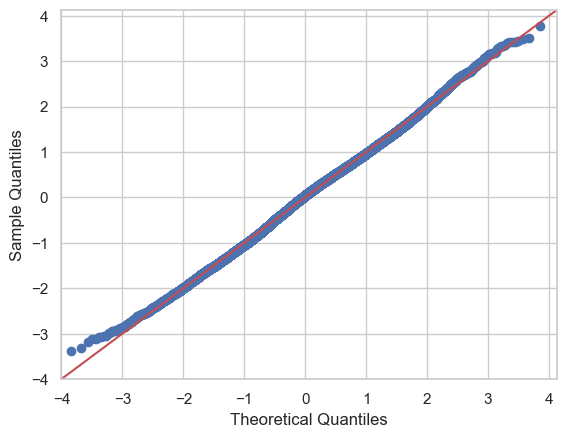

In [71]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid2 = model_2.resid
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

In [72]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_2.resid, model_2.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 312.4072120920588),
 ('p-value', 2.3479406476948724e-54),
 ('f-value', 15.894395721457641),
 ('f p-value', 6.586876656701532e-55)]

 As the p-value of the Bresuch-Pagan  test is less than  significance level (i.e. α = .05) then we reject the null hypothesis and conclude that heteroscedasticity is still present in the regression model  and we discern hetroscedasticity in error residuals.

In [73]:
df1_preprocessed = df1_preprocessed.drop(['bedrooms_10'], axis=1)

In [74]:
df1_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   bedrooms_3               21154 non-null  uint8  
 6   bedrooms_4               21154 non-null  uint8  
 7   bedrooms_5               21154 non-null  uint8  
 8   bedrooms_6               21154 non-null  uint8  
 9   bedrooms_7               21154 non-null  uint8  
 10  bedrooms_8               21154 non-null  uint8  
 11  bedrooms_9               21154 non-null  uint8  
 12  bedrooms_11              21154 non-null  uint8  
 13  reno_recently renovated  21154 non-null  uint8  
 14  reno_renovated        

In [75]:
df1_cont_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_log          21154 non-null  float64
 1   sqft_living_log    21154 non-null  float64
 2   sqft_basement_log  21154 non-null  float64
 3   sqft_lot15_log     21154 non-null  float64
 4   yr_old_log         21154 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


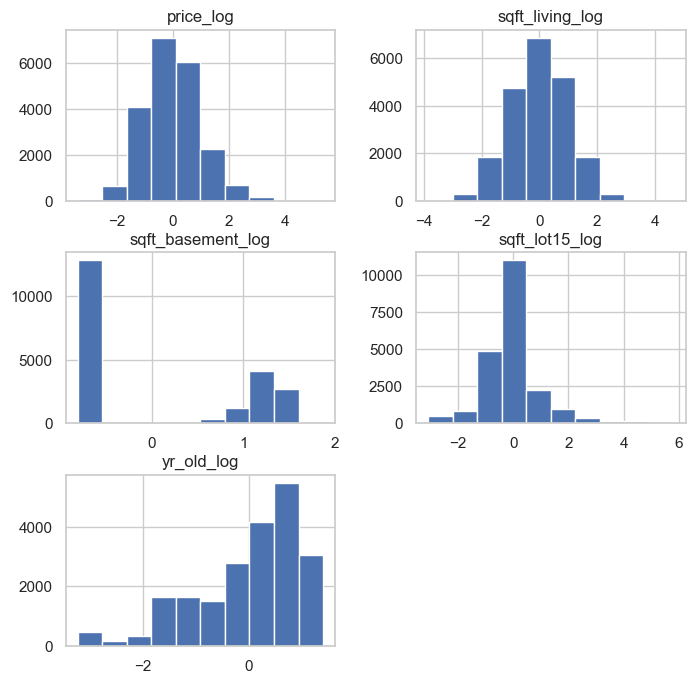

In [76]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df1_log_norm = df1_cont_log.apply(normalize)
df1_log_norm.hist(figsize  = [8, 8]);

In [77]:
df1_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_log          21154 non-null  float64
 1   sqft_living_log    21154 non-null  float64
 2   sqft_basement_log  21154 non-null  float64
 3   sqft_lot15_log     21154 non-null  float64
 4   yr_old_log         21154 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


In [78]:
df2_preprocessed = pd.concat([df1_log_norm, df1_cat], axis=1)

In [79]:
df2_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   bedrooms_3               21154 non-null  uint8  
 6   bedrooms_4               21154 non-null  uint8  
 7   bedrooms_5               21154 non-null  uint8  
 8   bedrooms_6               21154 non-null  uint8  
 9   bedrooms_7               21154 non-null  uint8  
 10  bedrooms_8               21154 non-null  uint8  
 11  bedrooms_9               21154 non-null  uint8  
 12  bedrooms_10              21154 non-null  uint8  
 13  bedrooms_11              21154 non-null  uint8  
 14  reno_recently renovate

In [80]:
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   bedrooms_3               21154 non-null  uint8
 1   bedrooms_4               21154 non-null  uint8
 2   bedrooms_5               21154 non-null  uint8
 3   bedrooms_6               21154 non-null  uint8
 4   bedrooms_7               21154 non-null  uint8
 5   bedrooms_8               21154 non-null  uint8
 6   bedrooms_9               21154 non-null  uint8
 7   bedrooms_10              21154 non-null  uint8
 8   bedrooms_11              21154 non-null  uint8
 9   reno_recently renovated  21154 non-null  uint8
 10  reno_renovated           21154 non-null  uint8
 11  floors_2.0               21154 non-null  uint8
 12  floors_2.5               21154 non-null  uint8
 13  floors_3.0               21154 non-null  uint8
 14  floors_3.5               21154 non-null  uint8
 15  wa

In [81]:
df2_preprocessed = df2_preprocessed.drop(['bedrooms_10'], axis=1)

In [82]:
df2_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   bedrooms_3               21154 non-null  uint8  
 6   bedrooms_4               21154 non-null  uint8  
 7   bedrooms_5               21154 non-null  uint8  
 8   bedrooms_6               21154 non-null  uint8  
 9   bedrooms_7               21154 non-null  uint8  
 10  bedrooms_8               21154 non-null  uint8  
 11  bedrooms_9               21154 non-null  uint8  
 12  bedrooms_11              21154 non-null  uint8  
 13  reno_recently renovated  21154 non-null  uint8  
 14  reno_renovated        

In [83]:
# X is my independent variables aka features
X_3 = df2_preprocessed.drop("price_log", axis=1)
# Y is my dependent variable which is "price" in this model
Y_3 = df2_preprocessed["price_log"]
# Splitting the data
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, Y_3, test_size = 0.2, random_state=12)

In [84]:
regressor = LinearRegression()
regressor.fit(X_3_train, y_3_train)

LinearRegression()

In [85]:
#Fitting a linear regression model and calculate MSE for test and train
linreg = LinearRegression()
linreg.fit(X_3_train, y_3_train)
y_3_hat_train = linreg.predict(X_3_train)
y_3_hat_test = linreg.predict(X_3_test)
# Calculating the R2 and MSE
train_r3 = r2_score(y_3_train, y_3_hat_train)
test_r3 = r2_score(y_3_test, y_3_hat_test)
train_mse = mean_squared_error(y_3_train, y_3_hat_train)
test_mse = mean_squared_error(y_3_test, y_3_hat_test)
print('Training Scores:', 'R2', train_r3, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r3, '&', 'Mean Absolute Error', test_mse)


Training Scores: R2 0.5253448235672229 & Mean Absolute Error 0.474512529820886
Testing Scores: R2 0.49920805959476333 & Mean Absolute Error 0.501275270938836


Comments:
The normalisation didn't change the results significantly.
The training R2 is 2.6% higher than the testing R2.
The Training MSE and Testing MSE has increased since iteration 2
Train MSE was 0.131(model_2) Train MSE  IS 0.474 (Model_3)
Test MSE was 0.139(model_2) Test MSE  IS 0.501 (Model_3)

In [86]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_2_train X_2_test y_2_train y_2_test 
X_3_train_with_intercept = sm.add_constant(X_3_train)
model_3 = sm.OLS(y_3_train,X_3_train_with_intercept).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     984.6
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:50:49   Log-Likelihood:                -17705.
No. Observations:               16923   AIC:                         3.545e+04
Df Residuals:                   16903   BIC:                         3.560e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2798      0.018     15.164      0.000       0.244       0.316
sqft_living_log             0.8145      0.009     88.153      0.000       0.796       0.833
sqft_basement_log           0.0141      0.007      2.159      0.031       0.001       0.027
sqft_lot15_log             -0.0890      0.006    -13.826      0.000      -0.102      -0.076
yr_old_log                  0.1835      0.007     25.440      0.000       0.169       0.198
bedrooms_3                 -0.3848      0.018    -21.693      0.000      -0.420      -0.350
bedrooms_4                 -0.4872      0.021    -22.805      0.000      -0.529      -0.445
bedrooms_5                 -0.5105      0.029    -17.669      0.000      -0.567      -0.454
bedrooms_6                 -0.7459      0.052    -14.399      0.000      -0.847      -0.644
bedrooms_7                 -0.7897      0.135     -5.850      0.000      -1.054      -0.525
bedrooms_8                 -0.6480      0.221     -2.932      0.003      -1.081      -0.215
bedrooms_9                 -1.0841      0.346     -3.131      0.002      -1.763      -0.405
bedrooms_11                -1.5455      0.690     -2.239      0.025      -2.899      -0.192
reno_recently renovated     0.3123      0.058      5.360      0.000       0.198       0.427
reno_renovated              0.1472      0.034      4.364      0.000       0.081       0.213
floors_2.0                  0.1690      0.016     10.250      0.000       0.137       0.201
floors_2.5                  0.5045      0.064      7.889      0.000       0.379       0.630
floors_3.0                  0.6404      0.039     16.412      0.000       0.564       0.717
floors_3.5                  0.6940      0.263      2.637      0.008       0.178       1.210
water_Yes                   1.2636      0.066     19.237      0.000       1.135       1.392
==============================================================================
Omnibus:                        2.223   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                2.178
Skew:                           0.000   Prob(JB):                        0.337
Kurtosis:                       2.944   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comments:
Neither the Adj. R-squared nor the Jarque-Bera result had changed.
On the other hand, standardization helped with the condition number - which is not at large anymore.

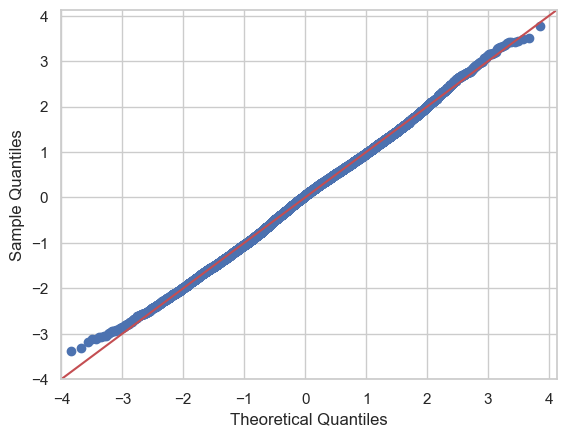

In [87]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid3 = model_3.resid
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)

In [88]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_3.resid, model_3.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 312.58989220999905),
 ('p-value', 5.2240226864563485e-55),
 ('f-value', 16.741900866092966),
 ('f p-value', 1.4505356304793354e-55)]

 Again after Iteration_3, the p-value of the test is less than  significance level (i.e. α = .05) then  so we have to reject the null hypothesis and conclude that heteroscedasticity is still present in the regression model as we don't observe any change in the residuals behaviour.


Following code snippet will generate sorted dataframe with feature name and it's p-value. 
 Hence, you will see most relevant features on the top (p-values will be sorted in ascending order)

In [89]:
d = {}
for i in X_3_train_with_intercept.columns.tolist():
    d[f'{i}'] = model_3.pvalues[i]

df_pvalue= pd.DataFrame(d.items(), columns=['Var_name', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)


In [90]:
df_pvalue

,Var_name,p-Value
0,sqft_living_log,0.00
1,yr_old_log,0.00
2,bedrooms_4,0.00
3,bedrooms_3,0.00
4,water_Yes,0.00
5,bedrooms_5,0.00
6,floors_3.0,0.00
7,const,0.00
8,bedrooms_6,0.00
9,sqft_lot15_log,0.00


Review of the three Iterations:-
The THIRD model is created through 3 iterations. It explains 52.5% of the variablity in the dependent variable (Y = Sale Prices) through independent variables (X= Features / Predictors).
Through iterations,the following was achieved:
1) Reduced Jarqe-Bera score from 178643.228 to 2.17
2) Difference in Train MSE and Test MSE is reduced
3) Condition no is is also reduced substantially through iterations


Just to be able to derive more explicit and discernable insights i have decided to do iteration 4 ( model_4) where i will be reinstating Grade and Bathrooms as their Correlation was 0.75 exact not greater..
I will also convert Bedrooms and floors into not more than three categorical variables to make the inferences more concise

STARTING ITERATION4

In [91]:
df2_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   bedrooms_3               21154 non-null  uint8  
 6   bedrooms_4               21154 non-null  uint8  
 7   bedrooms_5               21154 non-null  uint8  
 8   bedrooms_6               21154 non-null  uint8  
 9   bedrooms_7               21154 non-null  uint8  
 10  bedrooms_8               21154 non-null  uint8  
 11  bedrooms_9               21154 non-null  uint8  
 12  bedrooms_11              21154 non-null  uint8  
 13  reno_recently renovated  21154 non-null  uint8  
 14  reno_renovated        

In [92]:
df1_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_log          21154 non-null  float64
 1   sqft_living_log    21154 non-null  float64
 2   sqft_basement_log  21154 non-null  float64
 3   sqft_lot15_log     21154 non-null  float64
 4   yr_old_log         21154 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


In [93]:
reno = ['reno_recently renovated','reno_renovated']
df_reno = df2_preprocessed[reno]
df_reno.head()

,reno_recently renovated,reno_renovated
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [94]:
df_reno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   reno_recently renovated  21154 non-null  uint8
 1   reno_renovated           21154 non-null  uint8
dtypes: uint8(2)
memory usage: 722.6 KB


In [95]:
df3_preprocessed = pd.concat([df1_log_norm, df_reno], axis=1)

In [96]:
water = ['water_Yes']
df_water = df2_preprocessed[water]
df_water.head()

,water_Yes
0,0
1,0
2,0
3,0
4,0


In [97]:
df3_preprocessed = pd.concat([df1_log_norm, df_reno, df_water], axis=1)

In [98]:
df3_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   reno_recently renovated  21154 non-null  uint8  
 6   reno_renovated           21154 non-null  uint8  
 7   water_Yes                21154 non-null  uint8  
dtypes: float64(5), uint8(3)
memory usage: 1.5 MB


In [99]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21154 non-null  int64  
 1   bathrooms      21154 non-null  float64
 2   sqft_living    21154 non-null  int64  
 3   sqft_lot       21154 non-null  int64  
 4   floors         21154 non-null  float64
 5   condition      21154 non-null  int64  
 6   grade          21154 non-null  int64  
 7   sqft_above     21154 non-null  int64  
 8   sqft_basement  21154 non-null  float64
 9   yr_built       21154 non-null  int64  
 10  sqft_living15  21154 non-null  int64  
 11  sqft_lot15     21154 non-null  int64  
 12  yr_old         21154 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.8 MB


In [100]:
df_num.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,yr_old
0,3,1.00,1180,5650,1.00,3,7,1180,0.00,1955,1340,5650,59
1,3,2.25,2570,7242,2.00,3,7,2170,400.00,1951,1690,7639,63
2,2,1.00,770,10000,1.00,3,6,770,0.00,1933,2720,8062,82
3,4,3.00,1960,5000,1.00,5,7,1050,910.00,1965,1360,5000,49
4,3,2.00,1680,8080,1.00,3,8,1680,0.00,1987,1800,7503,28


In [101]:
df_num.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,yr_old
count,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00
mean,3.36,2.10,2068.84,15299.90,1.48,3.42,7.64,1774.67,294.17,1970.10,1980.54,12904.29,44.23
std,0.90,0.77,914.44,41808.61,0.53,0.65,1.17,820.51,444.50,29.01,680.62,27523.80,29.00
min,1.00,0.50,370.00,520.00,1.00,1.00,3.00,370.00,0.00,1900.00,399.00,651.00,1.00
25%,3.00,1.50,1420.00,5100.00,1.00,3.00,7.00,1190.00,0.00,1951.00,1480.00,5134.00,19.00
50%,3.00,2.25,1900.00,7680.00,1.00,3.00,7.00,1550.00,0.00,1974.00,1840.00,7670.00,41.00
75%,4.00,2.50,2530.00,10793.00,2.00,4.00,8.00,2190.00,570.00,1995.00,2350.00,10125.00,63.00
max,11.00,8.00,13540.00,1651359.00,3.50,5.00,13.00,9410.00,4820.00,2014.00,6210.00,871200.00,115.00


In [102]:
numerable = ['bedrooms','bathrooms','floors','grade']
df_numer = df_num[numerable]
df_numer.head()

,bedrooms,bathrooms,floors,grade
0,3,1.00,1.00,7
1,3,2.25,2.00,7
2,2,1.00,1.00,6
3,4,3.00,1.00,7
4,3,2.00,1.00,8


In [103]:
df_numer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   21154 non-null  int64  
 1   bathrooms  21154 non-null  float64
 2   floors     21154 non-null  float64
 3   grade      21154 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.3 MB


In [104]:
df4_preprocessed = pd.concat([df1_log_norm, df_reno, df_water, df_numer], axis=1)

In [105]:
df4_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   reno_recently renovated  21154 non-null  uint8  
 6   reno_renovated           21154 non-null  uint8  
 7   water_Yes                21154 non-null  uint8  
 8   bedrooms                 21154 non-null  int64  
 9   bathrooms                21154 non-null  float64
 10  floors                   21154 non-null  float64
 11  grade                    21154 non-null  int64  
dtypes: float64(7), int64(2), uint8(3)
memory usage: 2.2 MB


In [106]:
df4_preprocessed.describe()

,price_log,sqft_living_log,sqft_basement_log,sqft_lot15_log,yr_old_log,reno_recently renovated,reno_renovated,water_Yes,bedrooms,bathrooms,floors,grade
count,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00
mean,-0.00,0.00,-0.00,-0.00,0.00,0.01,0.03,0.01,3.36,2.10,1.48,7.64
std,1.00,1.00,1.00,1.00,1.00,0.09,0.16,0.08,0.90,0.77,0.53,1.17
min,-3.38,-3.85,-0.80,-3.07,-3.23,0.00,0.00,0.00,1.00,0.50,1.00,3.00
25%,-0.70,-0.68,-0.80,-0.53,-0.60,0.00,0.00,0.00,3.00,1.50,1.00,7.00
50%,-0.05,0.01,-0.80,-0.03,0.25,0.00,0.00,0.00,3.00,2.25,1.00,7.00
75%,0.62,0.69,1.20,0.31,0.73,0.00,0.00,0.00,4.00,2.50,2.00,8.00
max,5.35,4.65,1.87,5.80,1.41,1.00,1.00,1.00,11.00,8.00,3.50,13.00


In [107]:

df4_preprocessed['bathrooms'] = df4_preprocessed['bathrooms'].astype('int64')
df4_preprocessed['floors'] = df4_preprocessed['floors'].astype('int64')

In [108]:
df4_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   reno_recently renovated  21154 non-null  uint8  
 6   reno_renovated           21154 non-null  uint8  
 7   water_Yes                21154 non-null  uint8  
 8   bedrooms                 21154 non-null  int64  
 9   bathrooms                21154 non-null  int64  
 10  floors                   21154 non-null  int64  
 11  grade                    21154 non-null  int64  
dtypes: float64(5), int64(4), uint8(3)
memory usage: 2.2 MB


In [109]:
df4_preprocessed['bathrooms']

0        1
1        2
2        1
3        3
4        2
        ..
21592    2
21593    2
21594    0
21595    2
21596    0
Name: bathrooms, Length: 21154, dtype: int64

In [110]:
df4_preprocessed['floors']

0        1
1        2
2        1
3        1
4        1
        ..
21592    3
21593    2
21594    2
21595    2
21596    2
Name: floors, Length: 21154, dtype: int64

In [111]:
df4_preprocessed.describe()

,price_log,sqft_living_log,sqft_basement_log,sqft_lot15_log,yr_old_log,reno_recently renovated,reno_renovated,water_Yes,bedrooms,bathrooms,floors,grade
count,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00,21154.00
mean,-0.00,0.00,-0.00,-0.00,0.00,0.01,0.03,0.01,3.36,1.74,1.43,7.64
std,1.00,1.00,1.00,1.00,1.00,0.09,0.16,0.08,0.90,0.73,0.55,1.17
min,-3.38,-3.85,-0.80,-3.07,-3.23,0.00,0.00,0.00,1.00,0.00,1.00,3.00
25%,-0.70,-0.68,-0.80,-0.53,-0.60,0.00,0.00,0.00,3.00,1.00,1.00,7.00
50%,-0.05,0.01,-0.80,-0.03,0.25,0.00,0.00,0.00,3.00,2.00,1.00,7.00
75%,0.62,0.69,1.20,0.31,0.73,0.00,0.00,0.00,4.00,2.00,2.00,8.00
max,5.35,4.65,1.87,5.80,1.41,1.00,1.00,1.00,11.00,8.00,3.00,13.00


In [112]:
df4_preprocessed['num_bedrooms'] = np.where(df4_preprocessed['bedrooms']<= 4, '4 or Less',
 np.where(df4_preprocessed['bedrooms'] <=8, 'Between 5 and 8', 'Greater than 8'))

In [113]:
df4_preprocessed['num_bedrooms'].value_counts()

4 or Less          19302
Between 5 and 8     1842
Greater than 8        10
Name: num_bedrooms, dtype: int64

In [114]:
df4_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   reno_recently renovated  21154 non-null  uint8  
 6   reno_renovated           21154 non-null  uint8  
 7   water_Yes                21154 non-null  uint8  
 8   bedrooms                 21154 non-null  int64  
 9   bathrooms                21154 non-null  int64  
 10  floors                   21154 non-null  int64  
 11  grade                    21154 non-null  int64  
 12  num_bedrooms             21154 non-null  object 
dtypes: float64(5), int64(4), object(1), uint8(3)
memory usage: 2.3+ MB


In [115]:
df4_preprocessed['num_bathrooms'] = np.where(df4_preprocessed['bathrooms']<= 3, '3 or Less',
 np.where(df4_preprocessed['bathrooms'] <=6, 'Between 3 and 6', 'Greater than 6'))

In [116]:
df4_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   reno_recently renovated  21154 non-null  uint8  
 6   reno_renovated           21154 non-null  uint8  
 7   water_Yes                21154 non-null  uint8  
 8   bedrooms                 21154 non-null  int64  
 9   bathrooms                21154 non-null  int64  
 10  floors                   21154 non-null  int64  
 11  grade                    21154 non-null  int64  
 12  num_bedrooms             21154 non-null  object 
 13  num_bathrooms            21154 non-null  object 
dtypes: float64(5), int64(4

In [117]:
df4_preprocessed['num_grade'] = np.where(df4_preprocessed['grade']<= 7, '7 or Less',
 np.where(df4_preprocessed['grade'] <=10, 'Between 7 and 10', 'Greater than 10'))

In [118]:
df4_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   reno_recently renovated  21154 non-null  uint8  
 6   reno_renovated           21154 non-null  uint8  
 7   water_Yes                21154 non-null  uint8  
 8   bedrooms                 21154 non-null  int64  
 9   bathrooms                21154 non-null  int64  
 10  floors                   21154 non-null  int64  
 11  grade                    21154 non-null  int64  
 12  num_bedrooms             21154 non-null  object 
 13  num_bathrooms            21154 non-null  object 
 14  num_grade             

In [119]:
df4_preprocessed['num_bathrooms'].value_counts()

3 or Less          20769
Between 3 and 6      381
Greater than 6         4
Name: num_bathrooms, dtype: int64

In [120]:
df4_preprocessed['num_grade'].value_counts()

7 or Less           11255
Between 7 and 10     9407
Greater than 10       492
Name: num_grade, dtype: int64

In [121]:
df4_preprocessed['num_floors'] = np.where(df4_preprocessed['floors']== 1, 'One floor',
 np.where(df4_preprocessed['floors'] ==2, 'Two Floors', 'Three Floors'))

In [122]:
df4_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   reno_recently renovated  21154 non-null  uint8  
 6   reno_renovated           21154 non-null  uint8  
 7   water_Yes                21154 non-null  uint8  
 8   bedrooms                 21154 non-null  int64  
 9   bathrooms                21154 non-null  int64  
 10  floors                   21154 non-null  int64  
 11  grade                    21154 non-null  int64  
 12  num_bedrooms             21154 non-null  object 
 13  num_bathrooms            21154 non-null  object 
 14  num_grade             

In [123]:
df4_preprocessed['num_floors'].value_counts()

One floor       12573
Two Floors       8029
Three Floors      552
Name: num_floors, dtype: int64

In [124]:
df4_preprocessed = df4_preprocessed.drop(['bedrooms','bathrooms','floors','grade'], axis=1)

In [125]:
df4_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   reno_recently renovated  21154 non-null  uint8  
 6   reno_renovated           21154 non-null  uint8  
 7   water_Yes                21154 non-null  uint8  
 8   num_bedrooms             21154 non-null  object 
 9   num_bathrooms            21154 non-null  object 
 10  num_grade                21154 non-null  object 
 11  num_floors               21154 non-null  object 
dtypes: float64(5), object(4), uint8(3)
memory usage: 2.2+ MB


In [126]:
# Creating dummies for "num_bedrooms", "num_bathrooms", "num_grade" and "num_floors"  features.
# Dropping one of the dummy variables for each categorical feature to avoid "dummy variable trap"
num_bedrooms_dummies = pd.get_dummies(df4_preprocessed['num_bedrooms'], prefix='bed', drop_first=True)
num_bathrooms_dummies = pd.get_dummies(df4_preprocessed['num_bathrooms'], prefix='bath', drop_first=True)
num_grade_dummies = pd.get_dummies(df4_preprocessed['num_grade'], prefix='gra', drop_first=True)
num_floors_dummies = pd.get_dummies(df4_preprocessed['num_floors'], prefix='flo', drop_first=True)




In [127]:
# Adding the dummy columns
df4_catdummies = pd.concat([num_bedrooms_dummies, num_bathrooms_dummies, num_grade_dummies, num_floors_dummies], axis=1)

In [128]:
# Removing the original columns from the data 
df4_preprocessed = df4_preprocessed.drop(['num_bedrooms','num_bathrooms','num_grade','num_floors'], axis = 1)

In [129]:
df4_preprocessed = pd.concat([df4_preprocessed, df4_catdummies], axis=1)


In [130]:
df4_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_log                21154 non-null  float64
 1   sqft_living_log          21154 non-null  float64
 2   sqft_basement_log        21154 non-null  float64
 3   sqft_lot15_log           21154 non-null  float64
 4   yr_old_log               21154 non-null  float64
 5   reno_recently renovated  21154 non-null  uint8  
 6   reno_renovated           21154 non-null  uint8  
 7   water_Yes                21154 non-null  uint8  
 8   bed_Between 5 and 8      21154 non-null  uint8  
 9   bed_Greater than 8       21154 non-null  uint8  
 10  bath_Between 3 and 6     21154 non-null  uint8  
 11  bath_Greater than 6      21154 non-null  uint8  
 12  gra_Between 7 and 10     21154 non-null  uint8  
 13  gra_Greater than 10      21154 non-null  uint8  
 14  flo_Three Floors      

In [131]:
# X is my independent variables aka features
X_4 = df4_preprocessed.drop("price_log", axis=1)
# Y is my dependent variable which is "price" in this model
Y_4 = df4_preprocessed["price_log"]
# Splitting the data
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, Y_4, test_size = 0.2, random_state=12)

In [132]:
regressor = LinearRegression()
regressor.fit(X_4_train, y_4_train)

LinearRegression()

In [133]:
#Fitting a linear regression model and calculate MSE for test and train
linreg = LinearRegression()
linreg.fit(X_4_train, y_4_train)
y_4_hat_train = linreg.predict(X_4_train)
y_4_hat_test = linreg.predict(X_4_test)
# Calculating the R2 and MSE
train_r4 = r2_score(y_4_train, y_4_hat_train)
test_r4 = r2_score(y_4_test, y_4_hat_test)
train_mse = mean_squared_error(y_4_train, y_4_hat_train)
test_mse = mean_squared_error(y_4_test, y_4_hat_test)
print('Training Scores:', 'R2', train_r4, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r4, '&', 'Mean Absolute Error', test_mse)


Training Scores: R2 0.5715770749956647 & Mean Absolute Error 0.4282941724240566
Testing Scores: R2 0.5413759221274972 & Mean Absolute Error 0.4590667108352063


In [134]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_4_train X_4_test y_4_train y_4_test 
X_4_train_with_intercept = sm.add_constant(X_4_train)
model_4 = sm.OLS(y_4_train,X_4_train_with_intercept).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1504.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:50:52   Log-Likelihood:                -16838.
No. Observations:               16923   AIC:                         3.371e+04
Df Residuals:                   16907   BIC:                         3.383e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.3511      0.010    -35.328      0.000      -0.371      -0.332
sqft_living_log             0.5187      0.009     61.019      0.000       0.502       0.535
sqft_basement_log           0.0390      0.006      6.284      0.000       0.027       0.051
sqft_lot15_log             -0.1002      0.006    -16.408      0.000      -0.112      -0.088
yr_old_log                  0.2162      0.007     31.477      0.000       0.203       0.230
reno_recently renovated     0.2621      0.055      4.736      0.000       0.154       0.371
reno_renovated              0.1679      0.032      5.246      0.000       0.105       0.231
water_Yes                   1.2041      0.062     19.292      0.000       1.082       1.326
bed_Between 5 and 8        -0.0508      0.019     -2.648      0.008      -0.088      -0.013
bed_Greater than 8         -0.2644      0.240     -1.100      0.271      -0.735       0.207
bath_Between 3 and 6        0.3762      0.042      8.940      0.000       0.294       0.459
bath_Greater than 6         0.9658      0.479      2.016      0.044       0.027       1.905
gra_Between 7 and 10        0.5654      0.013     41.955      0.000       0.539       0.592
gra_Greater than 10         1.4724      0.040     36.959      0.000       1.394       1.551
flo_Three Floors            0.3776      0.037     10.129      0.000       0.305       0.451
flo_Two Floors              0.1004      0.016      6.375      0.000       0.070       0.131
==============================================================================
Omnibus:                        1.830   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.802
Skew:                          -0.022   Prob(JB):                        0.406
Kurtosis:                       3.026   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

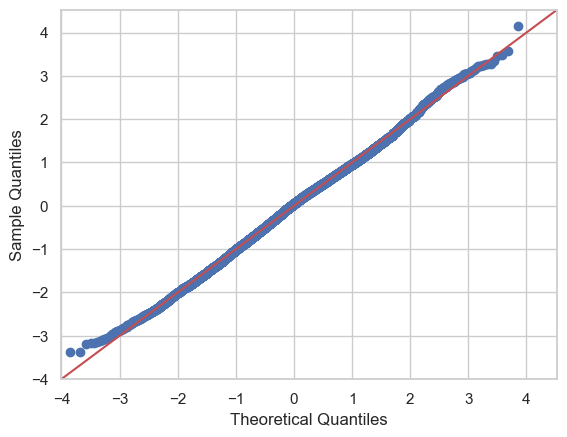

In [135]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid4 = model_4.resid
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)

In [136]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_4.resid, model_4.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 302.3900365157431),
 ('p-value', 1.7809416696224527e-55),
 ('f-value', 20.506701653765738),
 ('f p-value', 5.221667568300205e-56)]

Again after Iteration_4, the p-value of the test is less than significance level (i.e. α = .05)  so we have to reject the null hypothesis and conclude that heteroscedasticity is still present in the regression model as we don't observe any change in the residuals behaviour.

In [137]:
d = {}
for i in X_4_train_with_intercept.columns.tolist():
    d[f'{i}'] = model_4.pvalues[i]

df_pvalue= pd.DataFrame(d.items(), columns=['Var_name', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)


Following code snippet will generate sorted dataframe with feature name and it's p-value. Hence, you will see most relevant features on the top (p-values will be sorted in ascending order)

In [138]:
df_pvalue

,Var_name,p-Value
0,sqft_living_log,0.00
1,gra_Between 7 and 10,0.00
2,gra_Greater than 10,0.00
3,const,0.00
4,yr_old_log,0.00
5,water_Yes,0.00
6,sqft_lot15_log,0.00
7,flo_Three Floors,0.00
8,bath_Between 3 and 6,0.00
9,flo_Two Floors,0.00


Model_4 Final Review and conclusion:

1) R2 is increased by 4.6% since Model_3, 
2) The difference between the Train MSE and Test MSE is about 7.18%
3) Jarque Bera is further reduced from 2.178(model_3) to 1.802
4) Condition Number has also reduced from 166 to 127

Apart from the locations of the house (which cannot change through renovations the 3 most important determining features for variability in house prices are ( as per the three Iterations):-
1) Square Footage of the Living area of the house
2) Houses Graded by King County Grading system that are graded between 7 and 10 and greater than 10
3)  The Age of the House when Sold.
